# Loading data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [204]:
df_train = pd.read_csv('../claims_train.csv')
df_test = pd.read_csv('../claims_test.csv')
df = pd.concat([df_train, df_test], ignore_index=True)

df.head()
print(len(df))

678013


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDpol       678013 non-null  float64
 1   ClaimNb     678013 non-null  int64  
 2   Exposure    678013 non-null  float64
 3   Area        678013 non-null  object 
 4   VehPower    678013 non-null  int64  
 5   VehAge      678013 non-null  int64  
 6   DrivAge     678013 non-null  int64  
 7   BonusMalus  678013 non-null  int64  
 8   VehBrand    678013 non-null  object 
 9   VehGas      678013 non-null  object 
 10  Density     678013 non-null  int64  
 11  Region      678013 non-null  object 
dtypes: float64(2), int64(6), object(4)
memory usage: 62.1+ MB


# Cleaning

In [206]:
dirty_df = df.copy()

dirty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDpol       678013 non-null  float64
 1   ClaimNb     678013 non-null  int64  
 2   Exposure    678013 non-null  float64
 3   Area        678013 non-null  object 
 4   VehPower    678013 non-null  int64  
 5   VehAge      678013 non-null  int64  
 6   DrivAge     678013 non-null  int64  
 7   BonusMalus  678013 non-null  int64  
 8   VehBrand    678013 non-null  object 
 9   VehGas      678013 non-null  object 
 10  Density     678013 non-null  int64  
 11  Region      678013 non-null  object 
dtypes: float64(2), int64(6), object(4)
memory usage: 62.1+ MB


### Check ID is unique

In [207]:
len(dirty_df) == len(dirty_df['IDpol'].unique())

True

### Remove data entry errors

In [208]:
# all categorical values look fine
sorted(dirty_df['Region'].unique())
sorted(dirty_df['VehGas'].unique())
sorted(dirty_df['VehBrand'].unique())
sorted(dirty_df['Area'].unique())

['A', 'B', 'C', 'D', 'E', 'F']

In [209]:
# there does not seem to be any unrealistic values
dirty_df.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density
count,6.780130e+05,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000
mean,2.621857e+06,0.053247,0.528750,6.454631,7.044265,45.499122,59.761502,1792.422405
std,1.641783e+06,0.240117,0.364442,2.050906,5.666232,14.137444,15.636658,3958.646564
min,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000
25%,1.157951e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000
50%,2.272152e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000
75%,4.046274e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000
max,6.114330e+06,16.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000


### Check for missing values

In [210]:
# There is not a single missing value in the dataset
dirty_df.isnull().any(axis=1).sum()

np.int64(0)

### Check cardinality of categorical features

In [211]:
print(len(dirty_df['Region'].unique()))
print(len(dirty_df['VehGas'].unique()))
print(len(dirty_df['VehBrand'].unique()))
print(len(dirty_df['Area'].unique()))

22
2
11
6


## Summary

The dataset is already clean

# Exploring

In [212]:
clean_df = df.copy()

### Distribution of numeric features

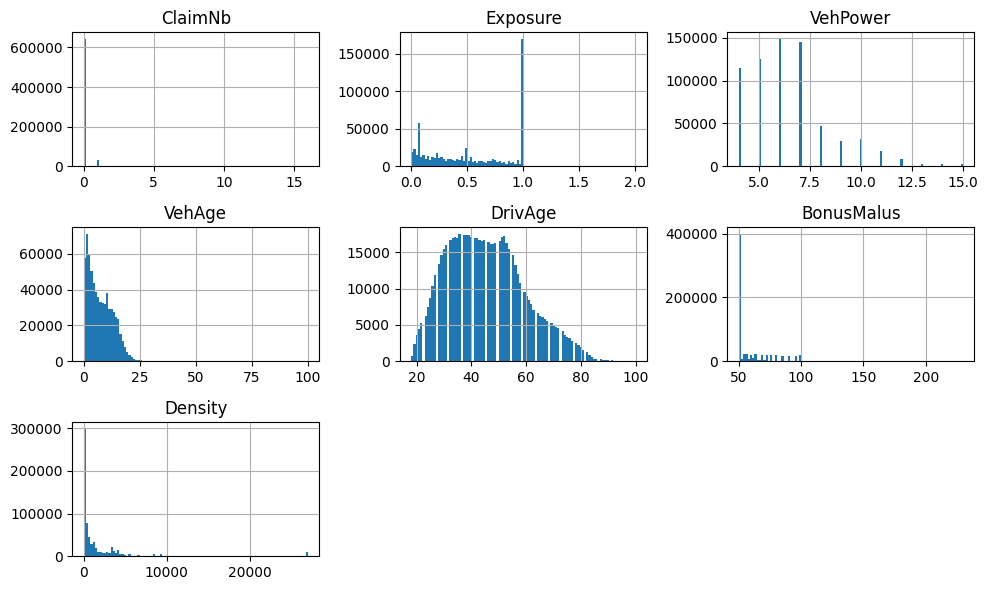

In [214]:
df.drop(columns='IDpol').hist(bins=100, figsize=(10, 6))

plt.tight_layout()

In [215]:
def five_num_sum_string(column_name):
  five_nums = list(clean_df[column_name].describe())
  return f"min: {round(five_nums[3], 1)}, 25%: {round(five_nums[4], 1)}, 50%: {round(five_nums[5], 1)}, 75%: {round(five_nums[6], 1)}, max: {round(five_nums[7], 1)}"

five_num_sum_string('DrivAge')

'min: 18.0, 25%: 34.0, 50%: 44.0, 75%: 55.0, max: 100.0'

count    678013.000000
mean         45.499122
std          14.137444
min          18.000000
25%          34.000000
50%          44.000000
75%          55.000000
max         100.000000
Name: DrivAge, dtype: float64


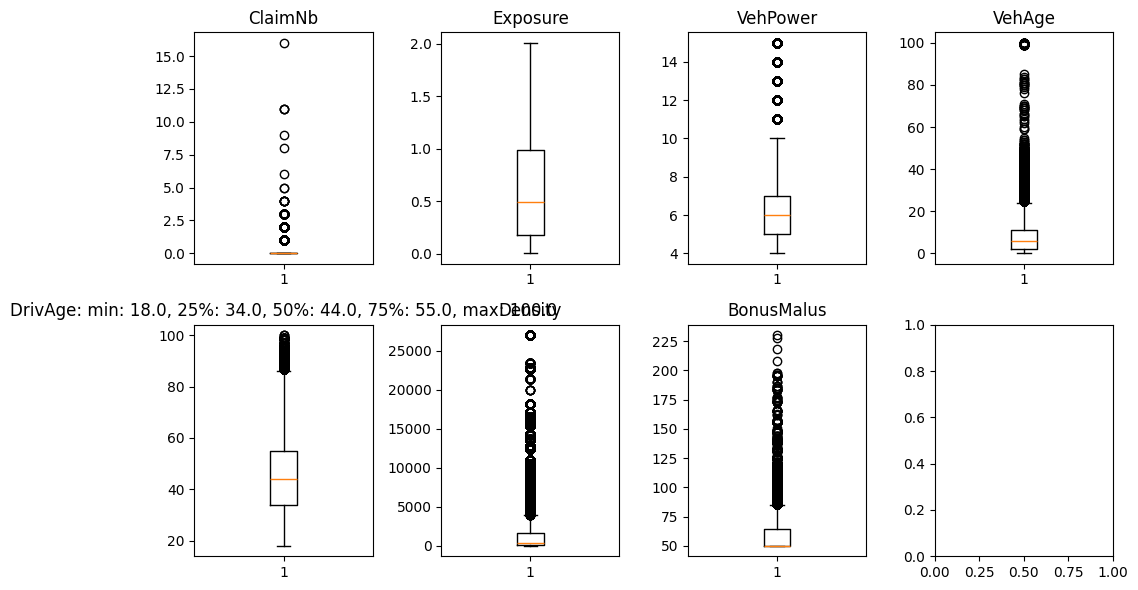

In [216]:
fig, ax = plt.subplots(2, 4, figsize=(10,6))

print(clean_df['DrivAge'].describe())

ax[0,0].set_title(f'ClaimNb')
ax[0,0].boxplot(clean_df['ClaimNb'])

ax[0,1].set_title('Exposure')
ax[0,1].boxplot(clean_df['Exposure'])

ax[0,2].set_title('VehPower')
ax[0,2].boxplot(clean_df['VehPower'])

ax[0,3].set_title('VehAge')
ax[0,3].boxplot(clean_df['VehAge'])

ax[1,0].set_title(f'DrivAge: {five_num_sum_string('DrivAge')}')
ax[1,0].boxplot(clean_df['DrivAge'])

ax[1,1].set_title('Density')
ax[1,1].boxplot(clean_df['Density'])

ax[1,2].set_title('BonusMalus')
ax[1,2].boxplot(clean_df['BonusMalus'])

plt.tight_layout()
plt.show()

# Target variable

## Exposure time is short and therefore uncertain

- 18% of the data is in the first quartile

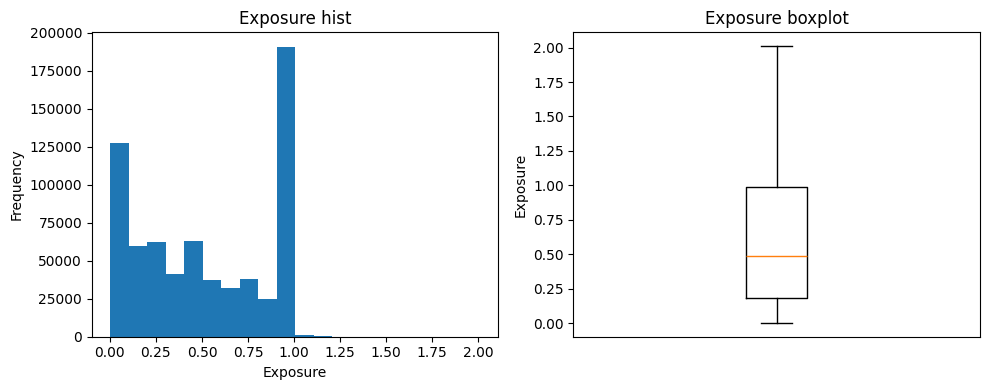

count    678013.000000
mean          0.528750
std           0.364442
min           0.002732
25%           0.180000
50%           0.490000
75%           0.990000
max           2.010000
Name: Exposure, dtype: float64
Number of policies less than a year: 0.7502275030124791


In [248]:
import matplotlib.cm as cm
cmap = cm.tab10

fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].set_title('Exposure hist')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Exposure')
ax[0].hist(df['Exposure'], bins=20)

ax[1].set_title('Exposure boxplot')
ax[1].set_ylabel('Exposure')
# hide x-axis ticks & labels (put this BEFORE plt.tight_layout()/plt.show())
ax[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
# (belt-and-suspenders)
ax[1].set_xticks([])
ax[1].set_xticklabels([])
ax[1].boxplot(df['Exposure'])

plt.tight_layout()
plt.show()

print(df['Exposure'].describe())

print(f"Number of policies less than a year: {1 - len(df[df['Exposure'] >= 1]) / len(df)}")

## Claims per year is a bad metric

In [218]:
df1 = df.copy()

- Distribution of claims per year of short term policies vs long term

In [219]:
df1['ClaimNb'].unique()

array([ 0,  1,  2,  3,  4,  6, 11,  5,  9,  8, 16])

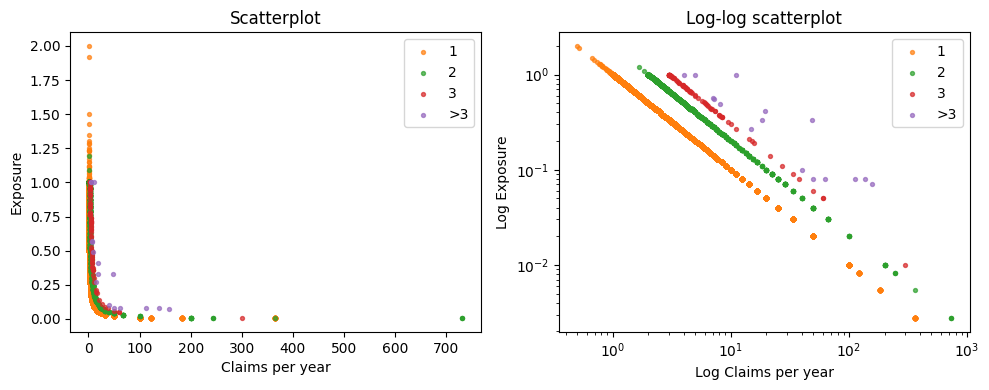

In [223]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# --- Recreate missing columns ---
# Claims per year (safe division; NaN if Exposure <= 0)
df1['cpy'] = np.where(df1['Exposure'] > 0, df1['ClaimNb'] / df1['Exposure'], np.nan)

# ClaimNb_cat: 0,1,2,3,>3 (encode >3 as 4)
# Make sure ClaimNb is non-negative integer before categorizing
claimnb_int = np.clip(df1['ClaimNb'].fillna(0).astype(int), 0, None)
df1['ClaimNb_cat'] = np.where(claimnb_int > 3, 4, claimnb_int)

# --- Plotting (same style as your code) ---
cmap = cm.tab10
colors = [cmap(i) for i in range(5)]
labels = ['0', '1', '2', '3', '>3']

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Scatter (linear)
for cat in [1, 2, 3, 4]:  # keep ignoring 0-claims if that's intentional
    mask = df1['ClaimNb_cat'] == cat
    ax[0].scatter(
        df1.loc[mask, 'cpy'],
        df1.loc[mask, 'Exposure'],
        label=labels[cat],
        s=8, alpha=0.7,
        color=colors[cat]
    )
ax[0].set_title('Scatterplot')
ax[0].set_xlabel('Claims per year')
ax[0].set_ylabel('Exposure')
ax[0].legend()

# Scatter (log-log) -> require positive values
for cat in [1, 2, 3, 4]:
    mask = (df1['ClaimNb_cat'] == cat) & (df1['cpy'] > 0) & (df1['Exposure'] > 0)
    ax[1].scatter(
        df1.loc[mask, 'cpy'],
        df1.loc[mask, 'Exposure'],
        label=labels[cat],
        s=8, alpha=0.7,
        color=colors[cat]
    )
ax[1].set_title('Log-log scatterplot')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('Log Claims per year')
ax[1].set_ylabel('Log Exposure')
ax[1].legend()

plt.tight_layout()
plt.show()